In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [198]:
dataset = pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [199]:
dataset.n_cores.unique()

array([2, 3, 5, 6, 1, 8, 4, 7], dtype=int64)

In [200]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

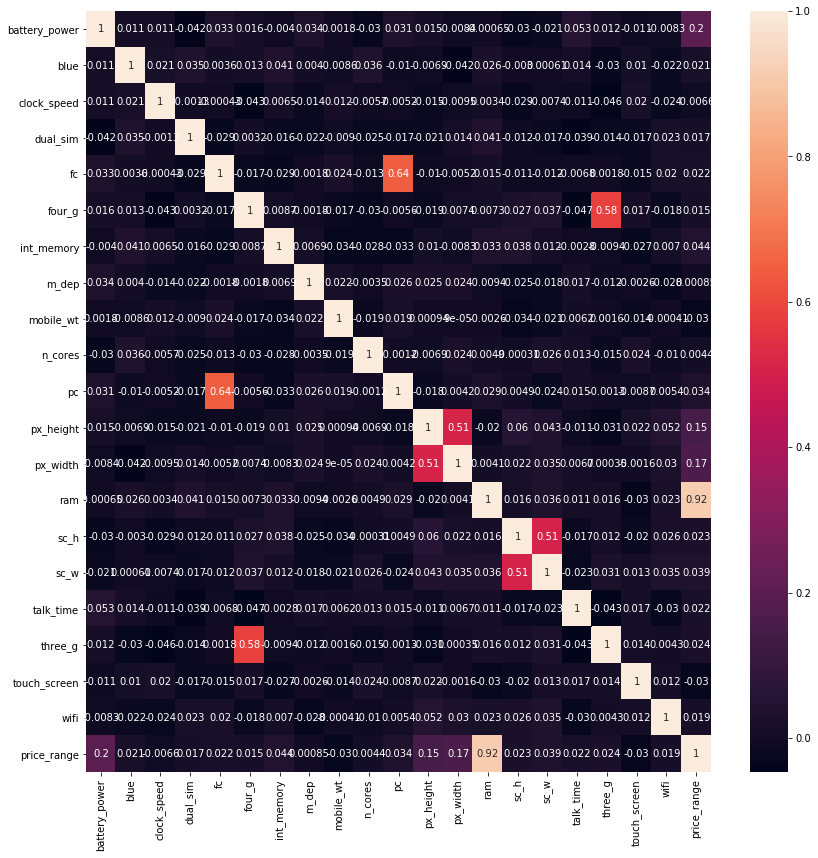

In [201]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(14,14))
sns.heatmap(dataset.corr(),annot=True,ax=ax)

In [202]:
for i in enumerate(dataset.columns):
    print(i)

(0, 'battery_power')
(1, 'blue')
(2, 'clock_speed')
(3, 'dual_sim')
(4, 'fc')
(5, 'four_g')
(6, 'int_memory')
(7, 'm_dep')
(8, 'mobile_wt')
(9, 'n_cores')
(10, 'pc')
(11, 'px_height')
(12, 'px_width')
(13, 'ram')
(14, 'sc_h')
(15, 'sc_w')
(16, 'talk_time')
(17, 'three_g')
(18, 'touch_screen')
(19, 'wifi')
(20, 'price_range')


In [207]:
X = dataset.iloc[:,[0,9,11,12,13]]
y = dataset.iloc[:,-1]

In [208]:
X.head()

,battery_power,n_cores,px_height,px_width,ram
0,842,2,20,756,2549
1,1021,3,905,1988,2631
2,563,5,1263,1716,2603
3,615,6,1216,1786,2769
4,1821,2,1208,1212,1411


In [209]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [211]:
onehotencoder = OneHotEncoder(categorical_features=[1])

In [212]:
df = pd.DataFrame(onehotencoder.fit_transform(X).toarray())

In [213]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,842.0,20.0,756.0,2549.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1021.0,905.0,1988.0,2631.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,563.0,1263.0,1716.0,2603.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,615.0,1216.0,1786.0,2769.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1821.0,1208.0,1212.0,1411.0


In [214]:
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [215]:
import seaborn as sns

In [216]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [217]:
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [218]:
classifier = XGBClassifier()

In [219]:
max_acc = 0
max_rs = 0
for i in range(1000):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state = i)
    classifier.fit(Xtrain,ytrain)
    pred = classifier.predict(Xtest)
    cm = confusion_matrix(ytest,pred)
    print(cm,end='\n\n')
    accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
    print(i,accuracy,sep="==>")
    if(accuracy>max_acc):
        max_acc = accuracy
        max_rs = i
    if(i%100==0):
        print("Maximum accuracy till now: "+str(max_acc))

[[121   3   0   0]
 [  6  96   8   0]
 [  0   9 108   8]
 [  0   0   8 133]]

0==>0.916
Maximum accuracy till now: 0.916
[[109   7   0   0]
 [  3 112  11   0]
 [  0  15 112   8]
 [  0   0  11 112]]

1==>0.89
[[118   4   0   0]
 [ 11 117   5   0]
 [  0   6 107   6]
 [  0   0   8 118]]

2==>0.92
[[117   3   0   0]
 [  6 119   7   0]
 [  0  12  99   6]
 [  0   0  11 120]]

3==>0.91
[[124   5   0   0]
 [  3 116  10   0]
 [  0   6 102   5]
 [  0   0   8 121]]

4==>0.926
[[122   7   0   0]
 [  9 101   8   0]
 [  0  12 113   4]
 [  0   0   8 116]]

5==>0.904
[[119   3   0   0]
 [  7 116  13   0]
 [  0  12 104   7]
 [  0   0   8 111]]

6==>0.9
[[131   5   0   0]
 [  4 105   1   0]
 [  0  11 111   9]
 [  0   0   9 114]]

7==>0.922
[[120   3   0   0]
 [  5 116   5   0]
 [  0  14 105   6]
 [  0   0   7 119]]

8==>0.92
[[123   7   0   0]
 [ 10 107   4   0]
 [  0  13 107   4]
 [  0   0   9 116]]

9==>0.906
[[113   5   0   0]
 [ 10 114   2   0]
 [  0  12 111  11]
 [  0   0   6 116]]

10==>0.908
[[11

[[126   2   0   0]
 [ 13 117   1   0]
 [  0   6 129   6]
 [  0   0   7  93]]

93==>0.93
[[114   1   0   0]
 [ 11 108   6   0]
 [  0   8 116  11]
 [  0   0  11 114]]

94==>0.904
[[126   5   0   0]
 [  3 112   5   0]
 [  0  12  99   7]
 [  0   0   9 122]]

95==>0.918
[[116  10   0   0]
 [ 10 106   3   0]
 [  0  16 111   4]
 [  0   0  11 113]]

96==>0.892
[[103   5   0   0]
 [  5 109   6   0]
 [  0  11 117   9]
 [  0   0  11 124]]

97==>0.906
[[118   8   0   0]
 [  5 100   5   0]
 [  0  19 103   6]
 [  0   0  14 122]]

98==>0.886
[[110   5   0   0]
 [  9 112   5   0]
 [  0  12 114  10]
 [  0   0  11 112]]

99==>0.896
[[129   6   0   0]
 [  6 105  12   0]
 [  0  14  97   7]
 [  0   0   8 116]]

100==>0.894
Maximum accuracy till now: 0.936
[[106   9   0   0]
 [  9 110   3   0]
 [  0  13 133   6]
 [  0   0   9 102]]

101==>0.902
[[108   2   0   0]
 [  9 115   6   0]
 [  0  12 106   4]
 [  0   0  10 128]]

102==>0.914
[[124   6   0   0]
 [  8 111   2   0]
 [  0   9 105   6]
 [  0   0   4 125]

[[124   5   0   0]
 [  6 116   6   0]
 [  0   5 109   9]
 [  0   0   5 115]]

184==>0.928
[[121   7   0   0]
 [  8 113  10   0]
 [  0   9 113   0]
 [  0   0  10 109]]

185==>0.912
[[118   9   0   0]
 [  7 100   7   0]
 [  0  12 112   4]
 [  0   0  14 117]]

186==>0.894
[[116   4   0   0]
 [  6 111   5   0]
 [  0   3 107   9]
 [  0   0  12 127]]

187==>0.922
[[127   5   0   0]
 [  6 113   8   0]
 [  0   8  91   9]
 [  0   0   8 125]]

188==>0.912
[[106   7   0   0]
 [  5 118   6   0]
 [  0  12 104   9]
 [  0   0  14 119]]

189==>0.894
[[119   2   0   0]
 [  6 124  11   0]
 [  0   6 104   5]
 [  0   0   9 114]]

190==>0.922
[[124   6   0   0]
 [  6 103   5   0]
 [  0  12 109   6]
 [  0   0  13 116]]

191==>0.904
[[124   6   0   0]
 [  5 111  13   0]
 [  0   5 107  10]
 [  0   0   9 110]]

192==>0.904
[[121   9   0   0]
 [  6 102   5   0]
 [  0   9 116   6]
 [  0   0  14 112]]

193==>0.902
[[123   9   0   0]
 [  6 125   4   0]
 [  0   6  97  10]
 [  0   0   8 112]]

194==>0.914
[[114   5 

[[117   5   0   0]
 [ 13 110  12   0]
 [  0   6  99   6]
 [  0   0  10 122]]

275==>0.896
[[110   3   0   0]
 [  9 118   8   0]
 [  0   6 105  10]
 [  0   0  11 120]]

276==>0.906
[[125   6   0   0]
 [ 10 105  18   0]
 [  0  10  95   9]
 [  0   0   7 115]]

277==>0.88
[[112   8   0   0]
 [  6 109   7   0]
 [  0  11 109   9]
 [  0   0  14 115]]

278==>0.89
[[129   9   0   0]
 [ 10 110   3   0]
 [  0  13 101   6]
 [  0   0  10 109]]

279==>0.898
[[135   6   0   0]
 [  8 113   4   0]
 [  0   6  96   6]
 [  0   0  10 116]]

280==>0.92
[[130   4   0   0]
 [  6 111   9   0]
 [  0  13 106   8]
 [  0   0  10 103]]

281==>0.9
[[127   5   0   0]
 [  6  93   6   0]
 [  0  13 128  12]
 [  0   0   9 101]]

282==>0.898
[[115   3   0   0]
 [  5 105  12   0]
 [  0   7 107   9]
 [  0   0   6 131]]

283==>0.916
[[117   4   0   0]
 [ 11 112   6   0]
 [  0   7 111   5]
 [  0   0   8 119]]

284==>0.918
[[116   6   0   0]
 [  3 121   4   0]
 [  0   8 106  10]
 [  0   0  10 116]]

285==>0.918
[[123   6   0  

[[116   5   0   0]
 [  6 111   9   0]
 [  0   6 115   6]
 [  0   0   8 118]]

366==>0.92
[[112   3   0   0]
 [  5 114  10   0]
 [  0   5 112   8]
 [  0   0   8 123]]

367==>0.922
[[125   2   0   0]
 [  7 103   4   0]
 [  0  13 113   6]
 [  0   0  14 113]]

368==>0.908
[[114   6   0   0]
 [  5 109   3   0]
 [  0   8 106  10]
 [  0   0   9 130]]

369==>0.918
[[117   4   0   0]
 [  5 105   7   0]
 [  0  12 117   8]
 [  0   0  11 114]]

370==>0.906
[[114   8   0   0]
 [  3 115  10   0]
 [  0   7 108  11]
 [  0   0   6 118]]

371==>0.91
[[117   4   0   0]
 [  6 115   3   0]
 [  0  12 109   7]
 [  0   0   8 119]]

372==>0.92
[[113   7   0   0]
 [ 12 109   4   0]
 [  0  12 109   9]
 [  0   0   6 119]]

373==>0.9
[[109   6   0   0]
 [  2 111   8   0]
 [  0   8 112  12]
 [  0   0  16 116]]

374==>0.896
[[127   6   0   0]
 [  4 110   4   0]
 [  0   5 101   9]
 [  0   0   9 125]]

375==>0.926
[[113   6   0   0]
 [  7 115   7   0]
 [  0  13 108   6]
 [  0   0   9 116]]

376==>0.904
[[114   7   0  

[[119   7   0   0]
 [ 12 101   5   0]
 [  0   9 114   8]
 [  0   0  11 114]]

457==>0.896
[[117   8   0   0]
 [  8 101   5   0]
 [  0   6 115   5]
 [  0   0  13 122]]

458==>0.91
[[127   3   0   0]
 [  2 121   5   0]
 [  0  12  95   6]
 [  0   0   9 120]]

459==>0.926
[[106   9   0   0]
 [ 10 107   3   0]
 [  0  10 112  11]
 [  0   0   7 125]]

460==>0.9
[[135  11   0   0]
 [  9 105   4   0]
 [  0  12 113   5]
 [  0   0  10  96]]

461==>0.898
[[126   6   0   0]
 [  4 105   6   0]
 [  0   8 107  17]
 [  0   0   7 114]]

462==>0.904
[[123   4   0   0]
 [  9 105   5   0]
 [  0   7 113   3]
 [  0   0   9 122]]

463==>0.926
[[121   9   0   0]
 [  5  93   4   0]
 [  0  14 104   9]
 [  0   0   8 133]]

464==>0.902
[[116   9   0   0]
 [  4 104  10   0]
 [  0   8 107   8]
 [  0   0  14 120]]

465==>0.894
[[122   4   0   0]
 [  5 108   8   0]
 [  0   4 101   5]
 [  0   0  11 132]]

466==>0.926
[[116   2   0   0]
 [ 14 100   7   0]
 [  0  10 111   6]
 [  0   0   8 126]]

467==>0.906
[[131   5   0

[[137  11   0   0]
 [  5 109   8   0]
 [  0   5  97   6]
 [  0   0   3 119]]

548==>0.924
[[ 99   5   0   0]
 [  9 118   5   0]
 [  0   9 111   4]
 [  0   0  14 126]]

549==>0.908
[[139   5   0   0]
 [  4 107   2   0]
 [  0   8 111   4]
 [  0   0  11 109]]

550==>0.932
[[110   3   0   0]
 [  8  95   6   0]
 [  0  14 117   9]
 [  0   0   8 130]]

551==>0.904
[[113   8   0   0]
 [  7 118   8   0]
 [  0   9 108  10]
 [  0   0   8 111]]

552==>0.9
[[123   7   0   0]
 [  5 120   8   0]
 [  0   9  95  12]
 [  0   0   7 114]]

553==>0.904
[[105   6   0   0]
 [  7 101   9   0]
 [  0   8 113  11]
 [  0   0  12 128]]

554==>0.894
[[113   7   0   0]
 [  4 119   4   0]
 [  0   6 102   5]
 [  0   0  14 126]]

555==>0.92
[[125   4   0   0]
 [  8 115   6   0]
 [  0   8 104   5]
 [  0   0   8 117]]

556==>0.922
[[130   4   0   0]
 [  6 109   3   0]
 [  0   9 119   6]
 [  0   0  11 103]]

557==>0.922
[[117   8   0   0]
 [  6 109  13   0]
 [  0  10 110   6]
 [  0   0  11 110]]

558==>0.892
[[106   7   0

[[130   3   0   0]
 [ 10 123   5   0]
 [  0   9  93   5]
 [  0   0  10 112]]

639==>0.916
[[137   5   0   0]
 [  8 107   7   0]
 [  0   9  92   5]
 [  0   0   9 121]]

640==>0.914
[[122   7   0   0]
 [  6 101   8   0]
 [  0   6 114  10]
 [  0   0  15 111]]

641==>0.896
[[130   6   0   0]
 [  3 105   7   0]
 [  0  12 104  10]
 [  0   0   3 120]]

642==>0.918
[[120   2   0   0]
 [  5 107  10   0]
 [  0  12 106   8]
 [  0   0  11 119]]

643==>0.904
[[102  10   0   0]
 [  9 126   7   0]
 [  0  10 103  12]
 [  0   0   6 115]]

644==>0.892
[[118   3   0   0]
 [  4 107  11   0]
 [  0  11 124   7]
 [  0   0   9 106]]

645==>0.91
[[ 99  10   0   0]
 [  9  99  10   0]
 [  0  10 129   8]
 [  0   0   7 119]]

646==>0.892
[[128   4   0   0]
 [  8 120   5   0]
 [  0   5 110   3]
 [  0   0   9 108]]

647==>0.932
[[114   7   0   0]
 [ 10 104   9   0]
 [  0  11  92  11]
 [  0   0  11 131]]

648==>0.882
[[105  11   0   0]
 [  8 120  10   0]
 [  0   9 110   4]
 [  0   0   7 116]]

649==>0.902
[[113   4  

[[113   2   0   0]
 [  8 111  11   0]
 [  0   6 115   4]
 [  0   0  10 120]]

730==>0.918
[[120   4   0   0]
 [  9 108  11   0]
 [  0  10 105   6]
 [  0   0  11 116]]

731==>0.898
[[126   9   0   0]
 [  6 115   4   0]
 [  0   4 107   5]
 [  0   0  10 114]]

732==>0.924
[[109   3   0   0]
 [  7 118   4   0]
 [  0  15 109   8]
 [  0   0  11 116]]

733==>0.904
[[114   4   0   0]
 [ 13 101  12   0]
 [  0   9 110  14]
 [  0   0   8 115]]

734==>0.88
[[125   4   0   0]
 [  5 114   9   0]
 [  0  10 100   7]
 [  0   0  13 113]]

735==>0.904
[[123   9   0   0]
 [  7 120   2   0]
 [  0  10  90   8]
 [  0   0  13 118]]

736==>0.902
[[121   4   0   0]
 [ 12 106   9   0]
 [  0   9 107   6]
 [  0   0   4 122]]

737==>0.912
[[135   8   0   0]
 [  7 104   6   0]
 [  0   7 117   6]
 [  0   0   6 104]]

738==>0.92
[[128   9   0   0]
 [  5 108   2   0]
 [  0   9 119   2]
 [  0   0   9 109]]

739==>0.928
[[114   5   0   0]
 [  6 119   6   0]
 [  0  10 109   5]
 [  0   0  15 111]]

740==>0.906
[[126   7   

[[116   2   0   0]
 [ 11 111   7   0]
 [  0  13 110   2]
 [  0   0   9 119]]

821==>0.912
[[111   6   0   0]
 [  3 130   5   0]
 [  0  11 103   3]
 [  0   0  10 118]]

822==>0.924
[[122   7   0   0]
 [  8  93   9   0]
 [  0  19 101  11]
 [  0   0  13 117]]

823==>0.866
[[116   8   0   0]
 [  8 110   5   0]
 [  0  11 111   6]
 [  0   0   5 120]]

824==>0.914
[[109   3   0   0]
 [  7 116   7   0]
 [  0   4 125   7]
 [  0   0   8 114]]

825==>0.928
[[127   4   0   0]
 [  8  95   5   0]
 [  0  13 108  10]
 [  0   0  12 118]]

826==>0.896
[[120   5   0   0]
 [  6 108   7   0]
 [  0   8 123   7]
 [  0   0   3 113]]

827==>0.928
[[121   5   0   0]
 [  8 116   6   0]
 [  0  11 109  10]
 [  0   0   9 105]]

828==>0.902
[[106   3   0   0]
 [  7 114   4   0]
 [  0   6 105   7]
 [  0   0  15 133]]

829==>0.916
[[110   7   0   0]
 [  5 131   4   0]
 [  0  11 116   5]
 [  0   0  12  99]]

830==>0.912
[[108   5   0   0]
 [  7 109   8   0]
 [  0   7 120   4]
 [  0   0  10 122]]

831==>0.918
[[122   6 

[[111   7   0   0]
 [  8 104   4   0]
 [  0   6 112  13]
 [  0   0  11 124]]

912==>0.902
[[116   4   0   0]
 [  6 116   3   0]
 [  0   9 117  11]
 [  0   0   7 111]]

913==>0.92
[[124   8   0   0]
 [  9 107   7   0]
 [  0   7 102  14]
 [  0   0  14 108]]

914==>0.882
[[122   5   0   0]
 [  8 137   2   0]
 [  0   3  96   7]
 [  0   0  10 110]]

915==>0.93
[[115   9   0   0]
 [  9 107   8   0]
 [  0  12 102  13]
 [  0   0   8 117]]

916==>0.882
[[125   6   0   0]
 [  3 103   7   0]
 [  0  14  96  11]
 [  0   0   7 128]]

917==>0.904
[[120   3   0   0]
 [  4 110   5   0]
 [  0  11 118  10]
 [  0   0   5 114]]

918==>0.924
[[118   5   0   0]
 [  5 128   6   0]
 [  0   8 103   8]
 [  0   0   7 112]]

919==>0.922
[[128   5   0   0]
 [  5 107   4   0]
 [  0  11 102  15]
 [  0   0  12 111]]

920==>0.896
[[114   7   0   0]
 [  9 120  13   0]
 [  0   3 110   6]
 [  0   0  10 108]]

921==>0.904
[[126   3   0   0]
 [  7 107   7   0]
 [  0   3 111   8]
 [  0   0   9 119]]

922==>0.926
[[122   4   

In [221]:
max_acc,max_rs

(0.948, 513)

In [224]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state = 513)
classifier.fit(Xtrain,ytrain)
pred = classifier.predict(Xtest)

In [225]:
cm = confusion_matrix(ytest,pred)
print(cm,end='\n\n')
accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
accuracy

[[129   5   0   0]
 [  5 122   2   0]
 [  0   7 118   4]
 [  0   0   3 105]]



0.948

In [139]:
t = pd.read_csv('test.csv')

In [140]:
t.drop(columns=['id'],inplace=True)

In [141]:
for i in enumerate(t.columns):
    print(i)

(0, 'battery_power')
(1, 'blue')
(2, 'clock_speed')
(3, 'dual_sim')
(4, 'fc')
(5, 'four_g')
(6, 'int_memory')
(7, 'm_dep')
(8, 'mobile_wt')
(9, 'n_cores')
(10, 'pc')
(11, 'px_height')
(12, 'px_width')
(13, 'ram')
(14, 'sc_h')
(15, 'sc_w')
(16, 'talk_time')
(17, 'three_g')
(18, 'touch_screen')
(19, 'wifi')


In [226]:
X1 = t.iloc[:,[0,9,11,12,13]]
X1.head()

,battery_power,n_cores,px_height,px_width,ram
0,1043,3,226,1412,3476
1,841,5,746,857,3895
2,1807,3,1270,1366,2396
3,1546,8,295,1752,3893
4,1434,6,749,810,1773


In [227]:
df = pd.DataFrame(onehotencoder.fit_transform(X1).toarray())
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1043.0,226.0,1412.0,3476.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,841.0,746.0,857.0,3895.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1807.0,1270.0,1366.0,2396.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1546.0,295.0,1752.0,3893.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1434.0,749.0,810.0,1773.0


In [228]:
X1 = onehotencoder.fit_transform(X1).toarray()
X1 = X1[:, 1:]

In [229]:
y_res = classifier.predict(X1)
y_res

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [230]:
data = pd.DataFrame({'price_range':y_res[:]})
pd.DataFrame.to_csv(data, path_or_buf='result_XGB2.csv', encoding='utf-8')

In [231]:
from sklearn.decomposition import PCA

In [236]:
pca = PCA(0.97)

In [237]:
type(X)

numpy.ndarray

In [238]:
X_pca = pca.fit_transform(X)

In [239]:
X_pca.shape

(2000, 4)

In [240]:
np.sum(pca.explained_variance_ratio_)

0.9999995620847644

In [241]:
temp = pca.inverse_transform(X_pca)
temp.shape

(2000, 11)

In [242]:
temp

array([[1.23723151e-01, 1.19628175e-01, 1.42004637e-01, ...,
        2.00000215e+01, 7.55999970e+02, 2.54900000e+03],
       [1.04983785e-01, 1.27569207e-01, 1.37265409e-01, ...,
        9.05000012e+02, 1.98800000e+03, 2.63100000e+03],
       [1.21091898e-01, 1.38645964e-01, 1.38375478e-01, ...,
        1.26300000e+03, 1.71599997e+03, 2.60300001e+03],
       ...,
       [1.13483662e-01, 1.11688532e-01, 1.26507145e-01, ...,
        8.67999988e+02, 1.63200002e+03, 3.05700000e+03],
       [1.38785469e-01, 1.20264852e-01, 1.39976656e-01, ...,
        3.35999999e+02, 6.69999971e+02, 8.69000010e+02],
       [1.29109104e-01, 1.24246364e-01, 1.36390858e-01, ...,
        4.82999981e+02, 7.54000034e+02, 3.91900000e+03]])

In [243]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_pca,y,test_size=0.25,random_state = 220)
classifier.fit(Xtrain,ytrain)
pred = classifier.predict(Xtest)

In [244]:
max_acc = 0
max_rs = 0
for i in range(1000):
    Xtrain,Xtest,ytrain,ytest = train_test_split(X_pca,y,test_size=0.25,random_state = i)
    classifier.fit(Xtrain,ytrain)
    pred = classifier.predict(Xtest)
    cm = confusion_matrix(ytest,pred)
    print(cm,end='\n\n')
    accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
    print(i,accuracy,sep="==>")
    if(accuracy>max_acc):
        max_acc = accuracy
        max_rs = i
    if(i%100==0):
        print("Maximum accuracy till now: "+str(max_acc))

[[122   2   0   0]
 [  8  96   6   0]
 [  0   6 112   7]
 [  0   0   7 134]]

0==>0.928
Maximum accuracy till now: 0.928
[[107   9   0   0]
 [  3 116   7   0]
 [  0  15 115   5]
 [  0   0   9 114]]

1==>0.904
[[118   4   0   0]
 [ 12 115   6   0]
 [  0   5 106   8]
 [  0   0   8 118]]

2==>0.914
[[118   2   0   0]
 [  5 123   4   0]
 [  0   8 104   5]
 [  0   0  10 121]]

3==>0.932
[[124   5   0   0]
 [  3 120   6   0]
 [  0   9 100   4]
 [  0   0   9 120]]

4==>0.928
[[121   8   0   0]
 [  9 103   6   0]
 [  0  10 116   3]
 [  0   0  11 113]]

5==>0.906
[[117   5   0   0]
 [  3 122  11   0]
 [  0   9 107   7]
 [  0   0  13 106]]

6==>0.904
[[130   6   0   0]
 [  4 104   2   0]
 [  0  10 114   7]
 [  0   0   9 114]]

7==>0.924
[[120   3   0   0]
 [  8 113   5   0]
 [  0  11 108   6]
 [  0   0   6 120]]

8==>0.922
[[122   8   0   0]
 [  7 111   3   0]
 [  0  11 110   3]
 [  0   0   9 116]]

9==>0.918
[[111   7   0   0]
 [  8 115   3   0]
 [  0  12 111  11]
 [  0   0   4 118]]

10==>0.91

[[110   7   0   0]
 [  9 122   7   0]
 [  0  10 120   6]
 [  0   0   6 103]]

92==>0.91
[[126   2   0   0]
 [ 12 114   5   0]
 [  0   4 129   8]
 [  0   0   8  92]]

93==>0.922
[[114   1   0   0]
 [ 11 109   5   0]
 [  0   7 122   6]
 [  0   0  10 115]]

94==>0.92
[[126   5   0   0]
 [  4 112   4   0]
 [  0   4 108   6]
 [  0   0   8 123]]

95==>0.938
[[118   8   0   0]
 [  7 110   2   0]
 [  0  15 112   4]
 [  0   0  14 110]]

96==>0.9
[[101   7   0   0]
 [  5 108   7   0]
 [  0  10 117  10]
 [  0   0   9 126]]

97==>0.904
[[118   8   0   0]
 [  5 103   2   0]
 [  0  19 104   5]
 [  0   0  12 124]]

98==>0.898
[[109   6   0   0]
 [ 10 114   2   0]
 [  0  11 116   9]
 [  0   0  11 112]]

99==>0.902
[[128   7   0   0]
 [  8 105  10   0]
 [  0   7 104   7]
 [  0   0   8 116]]

100==>0.906
Maximum accuracy till now: 0.942
[[108   7   0   0]
 [  4 114   4   0]
 [  0  14 134   4]
 [  0   0   4 107]]

101==>0.926
[[107   3   0   0]
 [  9 116   5   0]
 [  0   9 108   5]
 [  0   0   6 132]]

1

[[117   3   0   0]
 [  5 106   4   0]
 [  0  15 116  11]
 [  0   0   9 114]]

183==>0.906
[[125   4   0   0]
 [  7 115   6   0]
 [  0   9 107   7]
 [  0   0   5 115]]

184==>0.924
[[121   7   0   0]
 [  8 115   8   0]
 [  0  10 110   2]
 [  0   0  12 107]]

185==>0.906
[[119   8   0   0]
 [  6 101   7   0]
 [  0   5 119   4]
 [  0   0   9 122]]

186==>0.922
[[113   7   0   0]
 [  4 115   3   0]
 [  0   4 109   6]
 [  0   0  11 128]]

187==>0.93
[[125   7   0   0]
 [  6 114   7   0]
 [  0   8  94   6]
 [  0   0   7 126]]

188==>0.918
[[107   6   0   0]
 [  8 117   4   0]
 [  0  12 109   4]
 [  0   0  12 121]]

189==>0.908
[[117   4   0   0]
 [  8 128   5   0]
 [  0   4 105   6]
 [  0   0   9 114]]

190==>0.928
[[124   6   0   0]
 [  4 107   3   0]
 [  0  13 104  10]
 [  0   0  13 116]]

191==>0.902
[[124   6   0   0]
 [  4 116   9   0]
 [  0   5 111   6]
 [  0   0   8 111]]

192==>0.924
[[124   6   0   0]
 [  5  99   9   0]
 [  0   6 120   5]
 [  0   0  13 113]]

193==>0.912
[[125   7  

[[107   7   0   0]
 [  4 122   9   0]
 [  0   8 109   3]
 [  0   0  11 120]]

274==>0.916
[[114   8   0   0]
 [ 13 112  10   0]
 [  0   7 101   3]
 [  0   0  11 121]]

275==>0.896
[[107   6   0   0]
 [  6 121   8   0]
 [  0   4 107  10]
 [  0   0  13 118]]

276==>0.906
[[125   6   0   0]
 [  4 113  16   0]
 [  0  10  99   5]
 [  0   0   3 119]]

277==>0.912
[[113   7   0   0]
 [  8 107   7   0]
 [  0   8 115   6]
 [  0   0  13 116]]

278==>0.902
[[129   9   0   0]
 [  8 108   7   0]
 [  0   9 103   8]
 [  0   0  12 107]]

279==>0.894
[[136   5   0   0]
 [  7 114   4   0]
 [  0   6  96   6]
 [  0   0   9 117]]

280==>0.926
[[128   6   0   0]
 [  5 111  10   0]
 [  0  15 103   9]
 [  0   0   8 105]]

281==>0.894
[[128   4   0   0]
 [  2  98   5   0]
 [  0  14 131   8]
 [  0   0   8 102]]

282==>0.918
[[115   3   0   0]
 [  5 106  11   0]
 [  0  10 106   7]
 [  0   0   4 133]]

283==>0.92
[[115   6   0   0]
 [  6 115   8   0]
 [  0   7 112   4]
 [  0   0  11 116]]

284==>0.916
[[118   4  

[[120   6   0   0]
 [  8 106  11   0]
 [  0  17 101  10]
 [  0   0   5 116]]

365==>0.886
[[115   6   0   0]
 [  6 114   6   0]
 [  0   5 119   3]
 [  0   0   9 117]]

366==>0.93
[[111   4   0   0]
 [  8 112   9   0]
 [  0   7 112   6]
 [  0   0   8 123]]

367==>0.916
[[124   3   0   0]
 [  5 104   5   0]
 [  0   9 117   6]
 [  0   0  12 115]]

368==>0.92
[[111   9   0   0]
 [  7 107   3   0]
 [  0   5 107  12]
 [  0   0   9 130]]

369==>0.91
[[118   3   0   0]
 [  2 110   5   0]
 [  0  14 116   7]
 [  0   0   9 116]]

370==>0.92
[[117   5   0   0]
 [  5 113  10   0]
 [  0   6 113   7]
 [  0   0   7 117]]

371==>0.92
[[114   7   0   0]
 [  5 113   6   0]
 [  0  11 113   4]
 [  0   0   9 118]]

372==>0.916
[[112   8   0   0]
 [  5 115   5   0]
 [  0   5 121   4]
 [  0   0   8 117]]

373==>0.93
[[110   5   0   0]
 [  3 108  10   0]
 [  0   9 111  12]
 [  0   0  20 112]]

374==>0.882
[[128   5   0   0]
 [  6 106   6   0]
 [  0   6 100   9]
 [  0   0  10 124]]

375==>0.916
[[114   5   0   

[[108  10   0   0]
 [  4 105   8   0]
 [  0  10 117   8]
 [  0   0   5 125]]

456==>0.91
[[122   4   0   0]
 [  8 107   3   0]
 [  0   7 116   8]
 [  0   0   7 118]]

457==>0.926
[[119   6   0   0]
 [  7 103   4   0]
 [  0   6 117   3]
 [  0   0  12 123]]

458==>0.924
[[127   3   0   0]
 [  3 116   9   0]
 [  0  11  95   7]
 [  0   0   6 123]]

459==>0.922
[[104  11   0   0]
 [  9 106   5   0]
 [  0   7 115  11]
 [  0   0   7 125]]

460==>0.9
[[137   9   0   0]
 [ 10 103   5   0]
 [  0  13 108   9]
 [  0   0   6 100]]

461==>0.896
[[124   8   0   0]
 [  3 104   8   0]
 [  0   9 108  15]
 [  0   0   7 114]]

462==>0.9
[[123   4   0   0]
 [  2 109   8   0]
 [  0   9 109   5]
 [  0   0   8 123]]

463==>0.928
[[118  12   0   0]
 [  4  95   3   0]
 [  0  11 108   8]
 [  0   0  11 130]]

464==>0.902
[[117   8   0   0]
 [  4 102  12   0]
 [  0   9 106   8]
 [  0   0  13 121]]

465==>0.892
[[119   7   0   0]
 [  4 108   9   0]
 [  0   5 103   2]
 [  0   0  10 133]]

466==>0.926
[[115   3   0  

[[123   5   0   0]
 [  3 125   7   0]
 [  0   9  87   7]
 [  0   0   6 128]]

547==>0.926
[[138  10   0   0]
 [  2 114   6   0]
 [  0   4  98   6]
 [  0   0   4 118]]

548==>0.936
[[101   3   0   0]
 [  7 117   8   0]
 [  0   5 114   5]
 [  0   0  11 129]]

549==>0.922
[[135   9   0   0]
 [  3 105   5   0]
 [  0   7 111   5]
 [  0   0  10 110]]

550==>0.922
[[110   3   0   0]
 [  9  96   4   0]
 [  0  14 119   7]
 [  0   0  10 128]]

551==>0.906
[[111  10   0   0]
 [ 11 113   9   0]
 [  0   9 111   7]
 [  0   0   6 113]]

552==>0.896
[[124   6   0   0]
 [  5 123   5   0]
 [  0   6 102   8]
 [  0   0   5 116]]

553==>0.93
[[106   5   0   0]
 [  9  99   9   0]
 [  0   9 114   9]
 [  0   0  10 130]]

554==>0.898
[[110  10   0   0]
 [  3 119   5   0]
 [  0   4 103   6]
 [  0   0  14 126]]

555==>0.916
[[124   5   0   0]
 [  9 113   7   0]
 [  0   8 104   5]
 [  0   0   7 118]]

556==>0.918
[[131   3   0   0]
 [  4 110   4   0]
 [  0   9 121   4]
 [  0   0  13 101]]

557==>0.926
[[116   9  

[[124   3   0   0]
 [  6 114   8   0]
 [  0  12 109   8]
 [  0   0   8 108]]

638==>0.91
[[129   4   0   0]
 [  6 126   6   0]
 [  0  13  93   1]
 [  0   0  11 111]]

639==>0.918
[[136   6   0   0]
 [ 10 104   8   0]
 [  0   8  96   2]
 [  0   0   9 121]]

640==>0.914
[[122   7   0   0]
 [  9  98   8   0]
 [  0   6 115   9]
 [  0   0  13 113]]

641==>0.896
[[129   7   0   0]
 [  3 105   7   0]
 [  0  13 103  10]
 [  0   0   4 119]]

642==>0.912
[[120   2   0   0]
 [  8 106   8   0]
 [  0  14 107   5]
 [  0   0   9 121]]

643==>0.908
[[105   7   0   0]
 [  9 124   9   0]
 [  0  11 100  14]
 [  0   0   7 114]]

644==>0.886
[[118   3   0   0]
 [  3 109  10   0]
 [  0  11 123   8]
 [  0   0   8 107]]

645==>0.914
[[ 99  10   0   0]
 [  6 104   8   0]
 [  0   8 129  10]
 [  0   0   7 119]]

646==>0.902
[[127   5   0   0]
 [  2 129   2   0]
 [  0   4 109   5]
 [  0   0  11 106]]

647==>0.942
[[116   5   0   0]
 [  9 104  10   0]
 [  0  12  96   6]
 [  0   0  12 130]]

648==>0.892
[[106  10  

[[123   4   0   0]
 [  4 112   5   0]
 [  0   7 116   3]
 [  0   0  11 115]]

729==>0.932
[[111   4   0   0]
 [  5 117   8   0]
 [  0   6 115   4]
 [  0   0   9 121]]

730==>0.928
[[115   9   0   0]
 [  5 118   5   0]
 [  0  11 106   4]
 [  0   0  10 117]]

731==>0.912
[[127   8   0   0]
 [  4 114   7   0]
 [  0   3 109   4]
 [  0   0  11 113]]

732==>0.926
[[107   5   0   0]
 [  6 117   6   0]
 [  0  12 113   7]
 [  0   0   9 118]]

733==>0.91
[[113   5   0   0]
 [ 11 109   6   0]
 [  0   9 115   9]
 [  0   0   9 114]]

734==>0.902
[[124   5   0   0]
 [  4 117   7   0]
 [  0  11 103   3]
 [  0   0   7 119]]

735==>0.926
[[126   6   0   0]
 [  6 121   2   0]
 [  0  10  90   8]
 [  0   0  13 118]]

736==>0.91
[[123   2   0   0]
 [ 13 107   7   0]
 [  0  10 103   9]
 [  0   0   6 120]]

737==>0.906
[[135   8   0   0]
 [  6 105   6   0]
 [  0  10 114   6]
 [  0   0   7 103]]

738==>0.914
[[128   9   0   0]
 [  2 109   4   0]
 [  0  10 115   5]
 [  0   0   7 111]]

739==>0.926
[[113   6   

[[119   6   0   0]
 [  3 116   2   0]
 [  0  12  97   5]
 [  0   0   7 133]]

820==>0.93
[[116   2   0   0]
 [ 12 111   6   0]
 [  0  10 110   5]
 [  0   0  10 118]]

821==>0.91
[[112   5   0   0]
 [  4 129   5   0]
 [  0  13  99   5]
 [  0   0   8 120]]

822==>0.92
[[122   7   0   0]
 [  8  97   5   0]
 [  0  18 102  11]
 [  0   0  12 118]]

823==>0.878
[[118   6   0   0]
 [  6 111   6   0]
 [  0  12 109   7]
 [  0   0   4 121]]

824==>0.918
[[107   5   0   0]
 [  9 114   7   0]
 [  0   5 125   6]
 [  0   0   6 116]]

825==>0.924
[[125   6   0   0]
 [  8  97   3   0]
 [  0  15 109   7]
 [  0   0  14 116]]

826==>0.894
[[116   9   0   0]
 [ 10 101  10   0]
 [  0  10 124   4]
 [  0   0   2 114]]

827==>0.91
[[120   6   0   0]
 [  5 119   6   0]
 [  0  12 106  12]
 [  0   0  10 104]]

828==>0.898
[[107   2   0   0]
 [  5 116   4   0]
 [  0   4 108   6]
 [  0   0  10 138]]

829==>0.938
[[109   8   0   0]
 [  3 133   4   0]
 [  0   9 119   4]
 [  0   0  10 101]]

830==>0.924
[[107   6   0 

[[112   6   0   0]
 [  7 102   7   0]
 [  0   7 114  10]
 [  0   0  10 125]]

912==>0.906
[[115   5   0   0]
 [  8 113   4   0]
 [  0   8 122   7]
 [  0   0   7 111]]

913==>0.922
[[123   9   0   0]
 [  4 109  10   0]
 [  0   8 104  11]
 [  0   0  11 111]]

914==>0.894
[[121   6   0   0]
 [  6 138   3   0]
 [  0   4  98   4]
 [  0   0   8 112]]

915==>0.938
[[117   7   0   0]
 [  7 110   7   0]
 [  0   7 112   8]
 [  0   0   7 118]]

916==>0.914
[[124   7   0   0]
 [  5  98  10   0]
 [  0  12  99  10]
 [  0   0   6 129]]

917==>0.9
[[118   5   0   0]
 [  6 107   6   0]
 [  0   8 121  10]
 [  0   0   5 114]]

918==>0.92
[[120   3   0   0]
 [  2 134   3   0]
 [  0   7 103   9]
 [  0   0   6 113]]

919==>0.94
[[127   6   0   0]
 [  7 106   3   0]
 [  0   8 108  12]
 [  0   0   9 114]]

920==>0.91
[[117   4   0   0]
 [  9 118  15   0]
 [  0   6 106   7]
 [  0   0  10 108]]

921==>0.898
[[125   4   0   0]
 [  5 114   2   0]
 [  0   3 113   6]
 [  0   0  10 118]]

922==>0.94
[[123   3   0   

In [245]:
max_acc,max_rs

(0.942, 79)